<h1><center>Customer Churn</center></h1>
<h2><center>Exploratory Data Analysis</center></h2>

### If you like my notebook upvote for it.😊😊

### You can also : 
* Check the **GitHub Project Repository**

[![](https://img.shields.io/badge/Customer%20Churn%20EDA-GitHub-100000?logo=github&logoColor=white)](https://github.com/AhmedHamada101/Telco-Customer-Churn-Data-Analysis)

* View the **Streamlit App** of this Project **Live** 

[![Live in Streamlit](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](https://telco-customer-churn-report.streamlit.app/)

## Data Dictionary

| Feature | Definition |
|:---|:---|
| CustomerID | A unique ID that identifies each customer. |
| Gender | The customer’s gender: Male, Female. |
| Senior Citizen | Indicates if the customer is 65 or older: Yes, No. |
| Partner | Indicates if the customer lives with any partner: Yes, No. |
| Dependents | Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc. |
| Tenure | Indicates the period the customer spent in the company. |
| Phone Service | Indicates if the customer subscribes to home phone service with the company: Yes, No. |
| Multiple Lines | Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No. |
| Internet Service | Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable. |
| Online Security | Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No. |
| Online Backup | Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No. |
| Device Protection | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No. |
| Tech Support | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No. |
| Streaming TV | Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service. |
| Streaming Movies | Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service. |
| Contract | Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year. |
| Paperless Billing | Indicates if the customer has chosen paperless billing: Yes, No. |
| Payment Method | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check. |
| Monthly Charge | Indicates the customer’s current total monthly charge for all their services from the company. |
| Total Charges | Indicates the customer’s total charges, calculated to the end of the quarter specified above. |
| Churn | Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value. |

# Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Reading Data

In [2]:
main_data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data = main_data.copy()
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.describe(include = 'O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# Data Cleanin 

### Duplicate Values

In [6]:
data.duplicated().sum()

0

### Missing Values

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Rename Columns

In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### Total Charges

In [10]:
data['totalcharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: totalcharges, dtype: object

In [11]:
len(data[data['totalcharges'] == ' '])

11

In [12]:
# we drop these rows because their percentage is too small
data = data[data['totalcharges'] != ' ']

In [13]:
len(data[data['totalcharges'] == ' '])

0

In [14]:
data['totalcharges'].dtype

dtype('O')

In [15]:
# Converting Total Charges to a numerical data type.
data['totalcharges'] = pd.to_numeric(data['totalcharges'])

In [16]:
data['totalcharges'].dtype

dtype('float64')

### Senior Citizen

In [17]:
data['seniorcitizen'].dtype

dtype('int64')

In [18]:
# Converting Senior Citizen to a categorical data type
data['seniorcitizen'] = data['seniorcitizen'].astype('object')

In [19]:
data['seniorcitizen'].dtype

dtype('O')

### Drop Unnecessary Columns

In [20]:
data.drop('customerid', axis = 1, inplace = True)

In [21]:
data.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No
onlinebackup,Yes,No,Yes,No,No


### Churn

In [22]:
data['churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
data['churn'].replace(to_replace = 'No',  value = 0, inplace = True)

In [23]:
data['churn'].value_counts(normalize = True)

0    0.734215
1    0.265785
Name: churn, dtype: float64

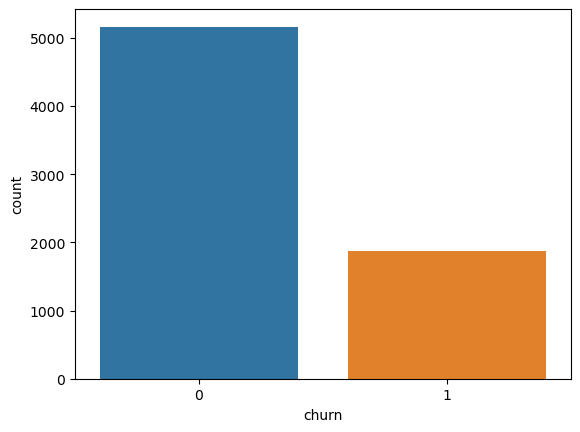

In [24]:
sns.countplot(data = data, x = 'churn');

# Correlation between Features

<AxesSubplot:>

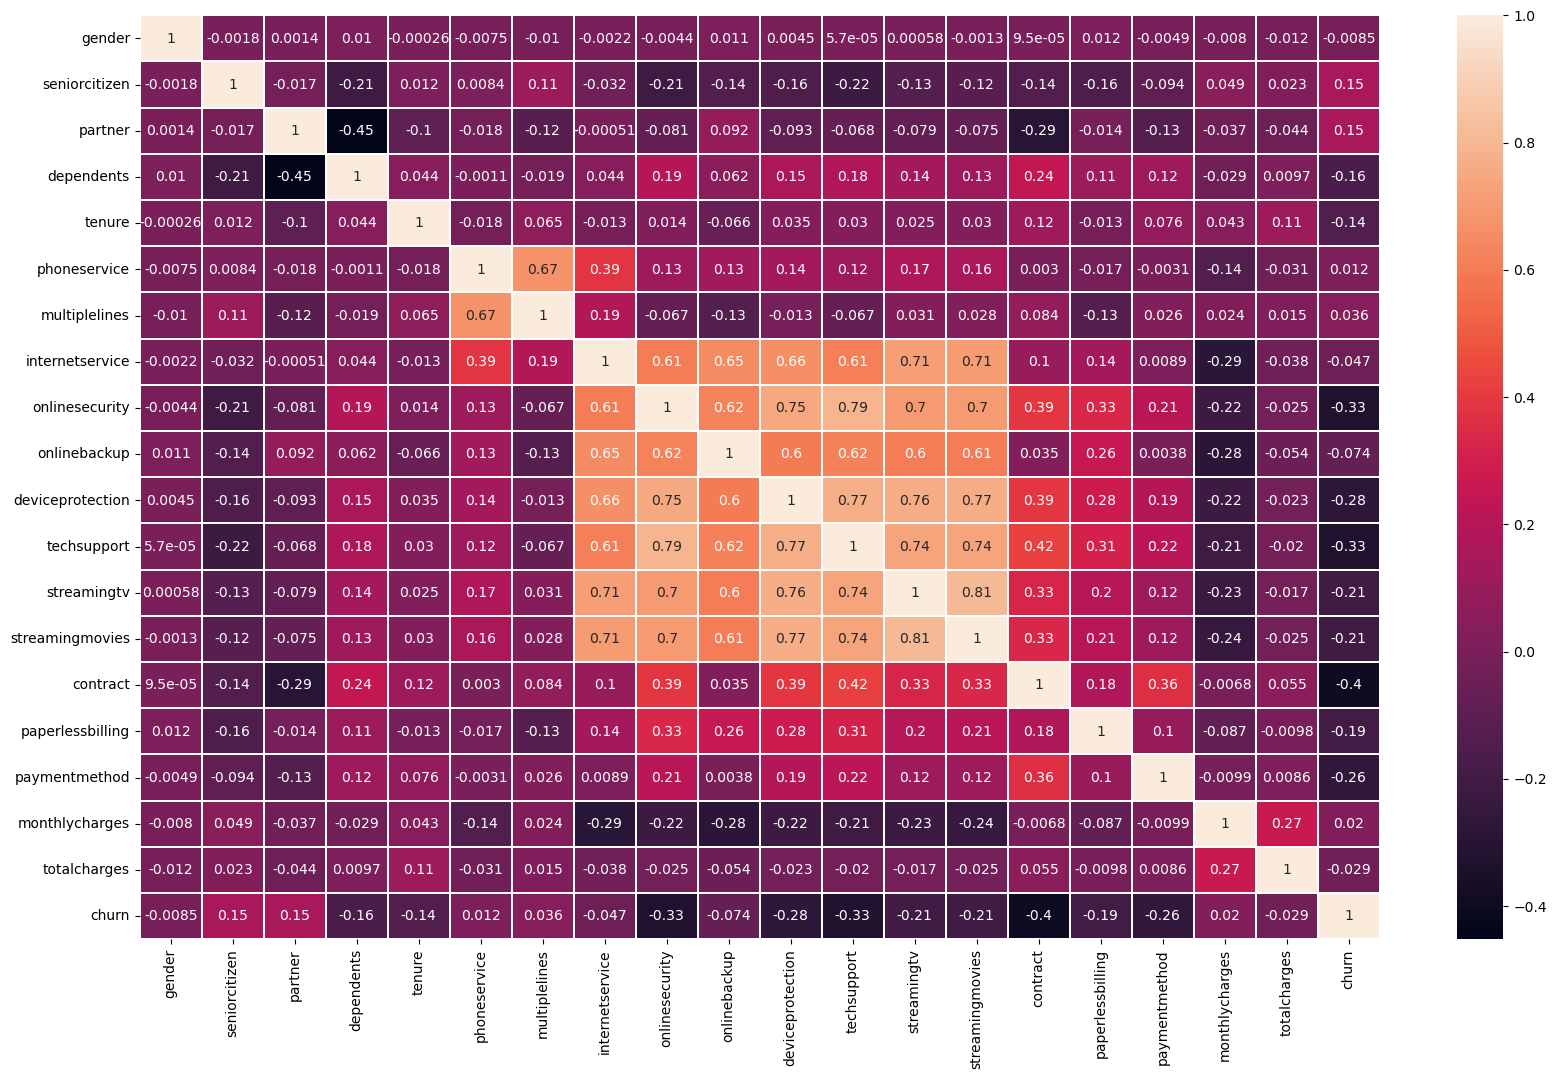

In [25]:
plt.figure(figsize=(20, 12))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths=.2, annot = True)

# Data Exploration

## 1. Numerical Features
There are only three numerical columns: tenure, monthly charges and total charges:

In [26]:
numerical_data = data[['tenure', 'monthlycharges', 'totalcharges']]

In [27]:
numerical_data.describe()

,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [28]:
churn_data = data[data.churn == 1]
not_churn_data = data[data.churn == 0]

In [29]:
def numeric_plot(feature):
    fig, ax = plt.subplots(1, 2, figsize = (12, 4))
    sns.histplot(data = churn_data, x = feature, ax = ax[0], color = 'green', kde = True)
    sns.histplot(data = not_churn_data, x = feature, ax = ax[1], color = 'red', kde = True)
    ax[0].set_xlabel(feature, size = 13)
    ax[0].set_ylabel('number of customers', size = 13)
    ax[0].set_title('Churn', size = 13)
    ax[1].set_xlabel(feature, size = 13)
    ax[1].set_ylabel('number of customers', size = 13)
    ax[1].set_title('Not Churn', size = 13)
    plt.show()

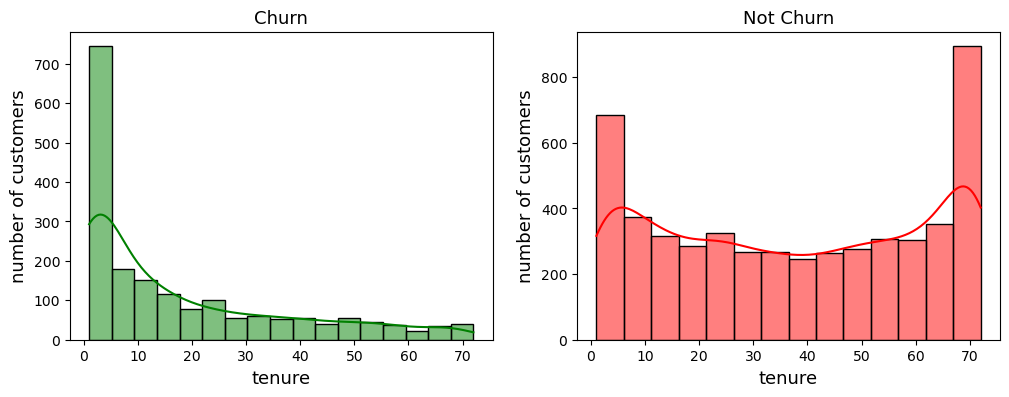

In [30]:
numeric_plot('tenure')

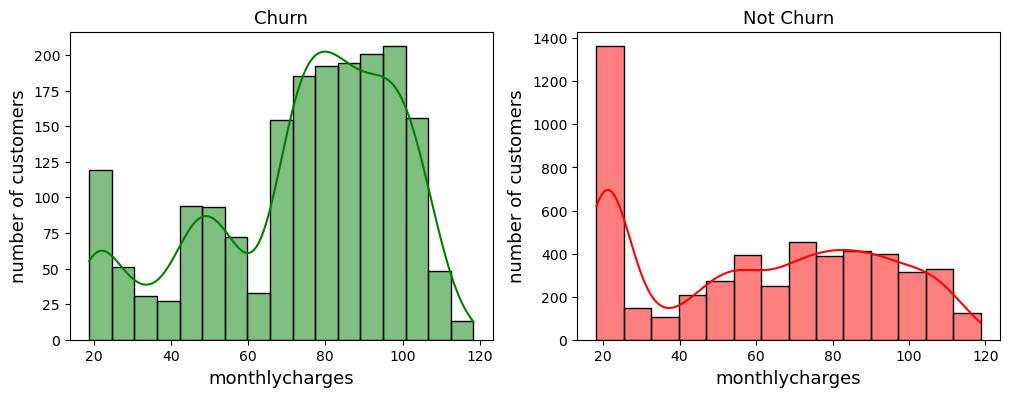

In [31]:
numeric_plot('monthlycharges')

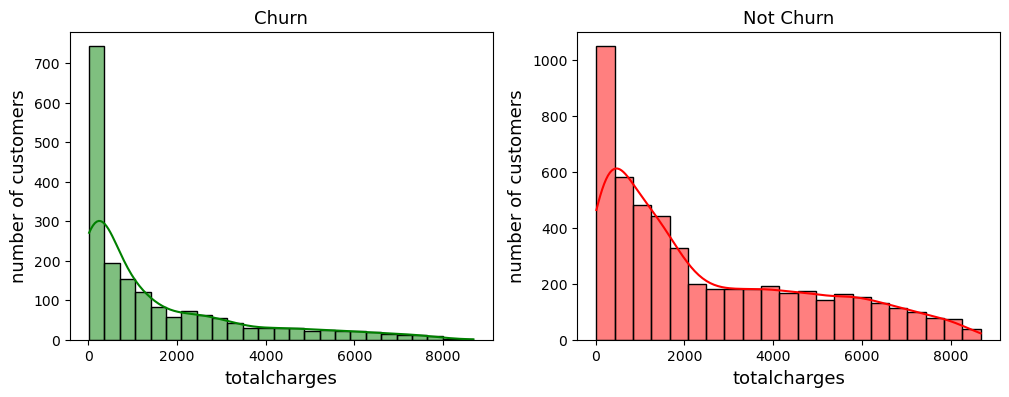

In [32]:
numeric_plot('totalcharges')

In [33]:
def exploring_numerical_features(data, col):
    fig = px.histogram(data, x = col, color = 'churn', title = f'Total Churn by {col.title()}', width = 700, height = 600)
    fig.show()

In [34]:
exploring_numerical_features(data, 'tenure')

In [35]:
exploring_numerical_features(data, 'monthlycharges')

In [36]:
exploring_numerical_features(data, 'totalcharges')

In [37]:
px.scatter(data,x = 'monthlycharges', y = 'totalcharges' , width = 700, height = 600)

- From the plots above we can conclude that:

   + customers who do not churn, tend to stay for a longer tenure with the company.
   + Recent customers are more probable to churn.
   + customers with higher MonthlyCharges are also more probable to churn.
   

## 2. Categorical Features

In [38]:
data.describe(include = 'O').T

,count,unique,top,freq
gender,7032,2,Male,3549
seniorcitizen,7032,2,0,5890
partner,7032,2,No,3639
dependents,7032,2,No,4933
phoneservice,7032,2,Yes,6352
multiplelines,7032,3,No,3385
internetservice,7032,3,Fiber optic,3096
onlinesecurity,7032,3,No,3497
onlinebackup,7032,3,No,3087
deviceprotection,7032,3,No,3094


### 2.1- Gender and  SeniorCitizen (Age)

In [39]:
gender_data = data['gender'].value_counts(normalize = True)
gender_data

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

In [40]:
px.pie(values = gender_data.values, names = gender_data.index, title = 'Gender', height = 400, width = 400)

In [41]:
seniorcitizen_data = data['seniorcitizen'].value_counts(normalize = True)
seniorcitizen_data

0    0.8376
1    0.1624
Name: seniorcitizen, dtype: float64

In [42]:
px.pie(values = seniorcitizen_data.values, names = seniorcitizen_data.index, title = 'SeniorCitizen', height = 400, width = 400)

In [43]:
data.groupby(['gender', 'seniorcitizen'])['churn'].mean().reset_index()

,gender,seniorcitizen,churn
0,Female,0,0.239794
1,Female,1,0.422535
2,Male,0,0.233277
3,Male,1,0.411150


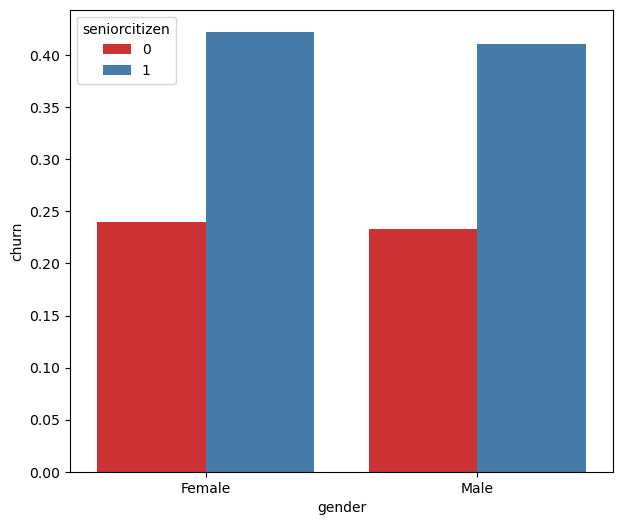

In [44]:
plt.figure(figsize = (7, 6))
sns.barplot(data = data, x = 'gender', y = 'churn', hue = 'seniorcitizen', ci = None, palette = 'Set1');

* From the plots above we can conclude that:
    + About half of the customers in our data set are male while the other half are female.
    + Gender doesn't affect churn.
    + Senior citizens are only 16% of customers, but they have a much higher churn rate of 42% and 23% for non-seniors.

### 2.2-  Partner and Dependents

In [45]:
partner_data = data['partner'].value_counts(normalize = True)
partner_data

No     0.517491
Yes    0.482509
Name: partner, dtype: float64

In [46]:
px.pie(values = partner_data.values, names = partner_data.index, title = 'Partner', height = 400, width = 400)

In [47]:
dependents_data = data['dependents'].value_counts(normalize = True)
dependents_data

No     0.701507
Yes    0.298493
Name: dependents, dtype: float64

In [48]:
px.pie(values = dependents_data.values, names = dependents_data.index, title = 'Dependents', height = 400, width = 400)

In [49]:
data.groupby(['partner', 'dependents'])['churn'].mean().reset_index()

,partner,dependents,churn
0,No,No,0.342378
1,No,Yes,0.214485
2,Yes,No,0.254083
3,Yes,Yes,0.143103


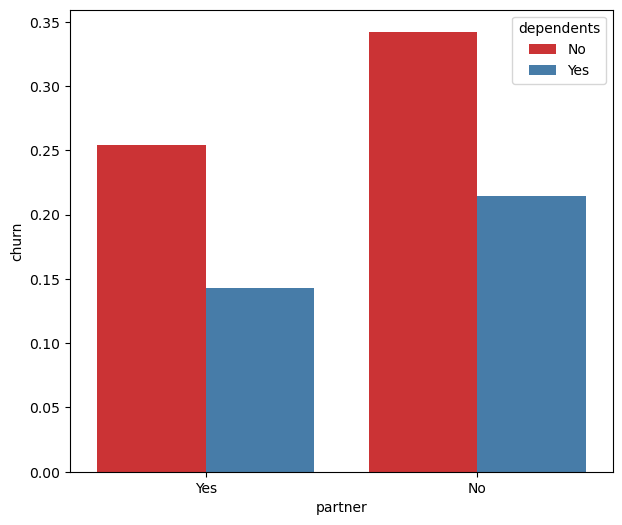

In [50]:
plt.figure(figsize = (7, 6))
sns.barplot(data = data, x = 'partner', y = 'churn', hue = 'dependents', ci = None, palette = 'Set1');

* From the plots above we can conclude that:
  + About 50% of the customers have a partner, while only 30% of the total customers have dependents.
  + Customers that doesn't have partners are more probable to churn.
  + Customers without dependents are also more probable to churn.


### 2.3- Phone Service and  Multiple Lines

In [51]:
data['phoneservice'].value_counts(normalize = True)

Yes    0.903299
No     0.096701
Name: phoneservice, dtype: float64

In [52]:
fig = px.bar(data['phoneservice'].value_counts(normalize = True), height = 500, width = 500, 
            color = data['phoneservice'].value_counts(normalize = True).index)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Phone Service', yaxis_title = 'Percentage of Customers')
fig.show()

In [53]:
data['multiplelines'].value_counts(normalize = True)

No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: multiplelines, dtype: float64

In [54]:
fig = px.bar(data['multiplelines'].value_counts(normalize = True), height = 500, width = 500, 
             color = data['multiplelines'].value_counts(normalize = True).index)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Phone Service', yaxis_title = 'Percentage of Customers')
fig.show()

In [55]:
data.groupby(['multiplelines'])['churn'].mean()

multiplelines
No                  0.250812
No phone service    0.250000
Yes                 0.286485
Name: churn, dtype: float64

In [56]:
data.groupby(['phoneservice'])['churn'].mean()

phoneservice
No     0.250000
Yes    0.267475
Name: churn, dtype: float64

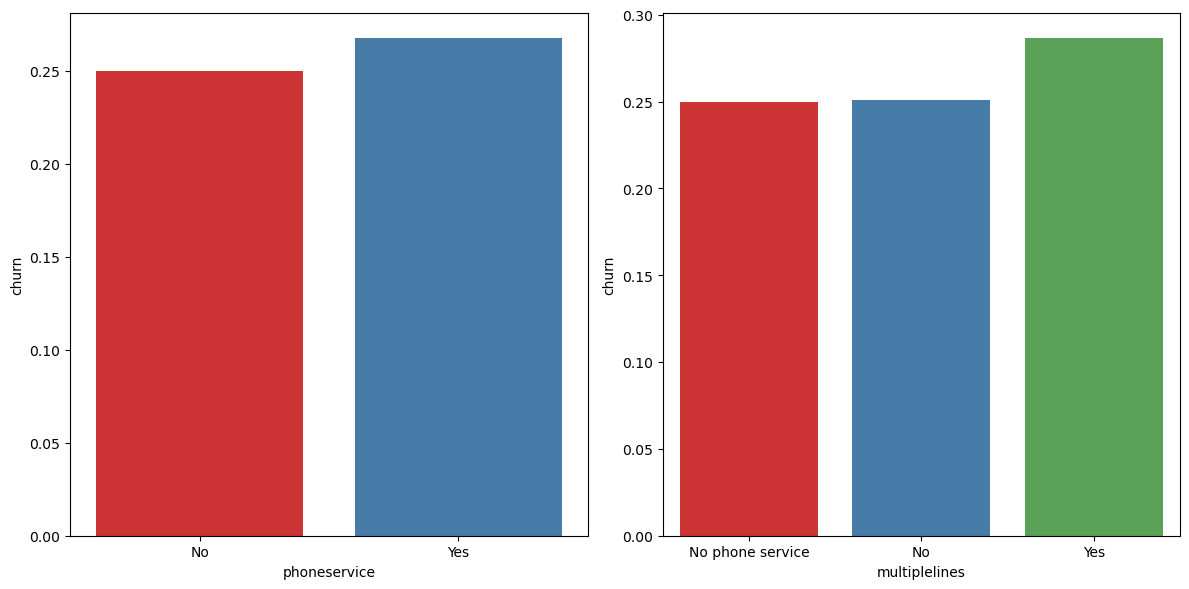

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
for i, col in enumerate(['phoneservice', 'multiplelines']):
    sns.barplot(data = data, x = col, y = 'churn', ci = None, ax = ax[i], palette = 'Set1')
plt.tight_layout()
plt.show()  

In [58]:
# Let's see how multiple lines affects the monthly charges:
px.histogram(data, x = 'multiplelines', y = 'monthlycharges', color = 'churn', height = 500, width = 600)

* From the plots above we can conclude that:
  + Few customers doesn't have phone service.
  + Customers who use multiple lines pay more monthly charges than the rest.
  + Customers with multiple lines have a slightly higher churn rate.
  


### 2.4- Internet Services

In [59]:
data['internetservice'].value_counts(normalize = True)

Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: internetservice, dtype: float64

In [60]:
fig = px.bar(data['internetservice'].value_counts(normalize = True), height = 500, width = 500, 
             color = data['internetservice'].value_counts(normalize = True).index)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Internet Service', yaxis_title = 'Percentage of Customers')
fig.show()

In [61]:
data.groupby('internetservice')['churn'].mean()

internetservice
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: churn, dtype: float64

In [62]:
fig = px.bar(data.groupby('internetservice')['churn'].mean(), height = 500, width = 600, 
             color = data.groupby('internetservice')['churn'].mean().index)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Internet Service', yaxis_title = 'Percentage of Churn')
fig.show()

In [63]:
# Let's see how internet service affects the monthly charges:
px.histogram(data, x = 'internetservice', y = 'monthlycharges', color = 'churn', height = 500, width = 600)

* From the plots above we can conclude that:
  + Clients without internet have a very low churn rate.
  + Customers who use fiber pay more monthly charges than they use DSL connections.
  + Customers with fiber are more probable to churn.
  


### 2.5- Addtional Services
There are six additional services for customers with internet ('onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies')

In [64]:
def exploring_addtional_services(feature):
    fig = px.bar(data[feature].value_counts(normalize = True), height = 500, width = 500, 
                 color = data[feature].value_counts(normalize = True).index)
    
    fig.update(layout_showlegend = False)
    fig.update_layout(xaxis_title = feature, yaxis_title = 'Percentage of Customers')
    fig.show()
    
    
    
def exploring_addtional_services_churn(feature): 
    fig = px.bar(data.groupby(feature)['churn'].mean(), height = 500, width = 600, 
                 color = data.groupby(feature)['churn'].mean().index)
    
    fig.update(layout_showlegend = False)
    fig.update_layout(xaxis_title = feature, yaxis_title = 'Percentage of Churn')
    fig.show()

#### 2.5.1- Online Security

In [65]:
exploring_addtional_services('onlinesecurity')

In [66]:
exploring_addtional_services_churn('onlinesecurity')

* From the plots above we can conclude that:  
   + Customers who don't subscribe to the online security service are more probable to churn.
   


#### 2.5.2- Tech Support

In [67]:
exploring_addtional_services('techsupport')

In [68]:
exploring_addtional_services_churn('techsupport')

* From the plots above we can conclude that:
     + Customers who don't subscribe to the tech support service are more probable to churn.
     


#### 2.5.3- Online Backup

In [69]:
exploring_addtional_services('onlinebackup')

In [70]:
exploring_addtional_services_churn('onlinebackup')

* From the plots above we can conclude that:
    + Customers who don't subscribe to the online backup service are more probable to churn.
    


#### 2.5.4- Device Protection

In [71]:
exploring_addtional_services('deviceprotection')

In [72]:
exploring_addtional_services_churn('deviceprotection')

* From the plots above we can conclude that:
    + Customers who don't subscribe to the device protection service are more probable to churn.
    


#### 2.5.5- Streaming TV

In [73]:
exploring_addtional_services('streamingtv')

In [74]:
exploring_addtional_services_churn('streamingtv')

* From the plots above we can conclude that:
    + Churn is not affected by streaming tv services.
    


#### 2.5.6- Streaming Movies

In [75]:
exploring_addtional_services('streamingmovies')

In [76]:
exploring_addtional_services_churn('streamingmovies')

* From the plots above we can conclude that:
    + Churn is not affected by streaming movies services.
    


### 2.6 Contract and Payment

#### 2.6.1- Contract

In [77]:
data['contract'].value_counts(normalize = True)

Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: contract, dtype: float64

In [78]:
exploring_addtional_services('contract')

In [79]:
exploring_addtional_services_churn('contract')

In [80]:
# Let's see how contract affects the monthly charges:
px.histogram(data, x = 'contract', y = 'monthlycharges', color = 'churn', height = 500, width = 600)

* From the plots above we can conclude that:
  + Customers who contract month to month are more probable to churn. Unlike those who contract every two year
    


#### 2.6.2- Paperless Billing

In [81]:
data['paperlessbilling'].value_counts(normalize = True)

Yes    0.592719
No     0.407281
Name: paperlessbilling, dtype: float64

In [82]:
exploring_addtional_services('paperlessbilling')

In [83]:
exploring_addtional_services_churn('paperlessbilling')

* From the plots above we can conclude that:
  + Customers with paperless billing are more probable to churn
    


#### 2.6.3- Payment Method

In [84]:
data['paymentmethod'].value_counts(normalize = True)

Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: paymentmethod, dtype: float64

In [85]:
exploring_addtional_services('paymentmethod')

In [86]:
exploring_addtional_services_churn('paymentmethod')

In [87]:
# Let's see how payment method affects the monthly charges:
px.histogram(data, x = 'paymentmethod', y = 'monthlycharges', color = 'churn', height = 500, width = 600)

* From the plots above we can conclude that:
   + The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate.
   + Mailed checks have lower charges.



# All Insights

- **In terms of Tenure**
 - Recent customers are more probable to churn.
 - customers who do not churn, tend to stay for a longer tenure with the company.


- **In terms of MonthlyCharges**
 - customers with higher MonthlyCharges are also more probable to churn.
 
 
- **In terms of Gender**
 - About half of the customers in our data set are male while the other half are female.
 - Gender doesn't affect churn.


- **In terms of SeniorCitizens**
 - Senior citizens are only 16% of customers, but they have a much higher churn rate of 42% and 23% for non-seniors.
 
 
- **In terms of Partners**
 - About 48% of the customers have a partner.
 - Customers that doesn't have partners are more probable to churn.


- **In terms of Dependents**
 - About only 30% of the total customers have dependents.
 - Customers without dependents are also more probable to churn.


- **In terms of PhoneService**
 - Few customers doesn't have phone service.


- **In terms of MultipleLines**
 - Customers with multiple lines have a slightly higher churn rate.


- **In terms of MultipleLines and MonthlyCharges**
 - Customers who use multiple lines pay more monthly charges than the rest.


- **In terms of InternetService**
 - Customers without internet have a very low churn rate.
 - Customers with fiber are more probable to churn.
 
 
- **In terms of InternetService and MonthlyCharges**
 - Customers who use fiber pay more monthly charges than they use DSL connections.


- **In terms of OnlineSecurity Service**
 - Customers who don't subscribe to the online security service are more probable to churn.
 
 
- **In terms of TechSupport Service**
 - Customers who don't subscribe to the tech support service are more probable to churn.


- **In terms of OnlineBackup Service**
 - Customers who don't subscribe to the online backup service are more probable to churn.


- **In terms of DeviceProtection Service**
 - Customers who don't subscribe to the device protection service are more probable to churn.


- **In terms of StreamingTV**
 - Churn is not affected by streaming tv services.


- **In terms of StreamingMovies**
 - Churn is not affected by streaming movies services.


- **In terms of Contract**
 - Customers who contract month to month are more probable to churn. Unlike those who contract every two year


- **In terms of PaperlessBilling**
 - Customers with paperless billing are more probable to churn


- **In terms of PaymentMethod**
 - The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate.


- **In terms of PaymentMethod and MonthlyCharges**
 - Mailed checks have lower monthly charges.

